In [32]:
#https://wtrust.com.br/
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

[Baixar base do yahoo](http://127.0.0.1:8888/notebooks/trades/pairs_trading_b3/utils/Historic-Yahoo.ipynb)

In [52]:
def plot_pairs(pairs, data, period_ext=None):
    counter=-1
    for i, row in pairs.iterrows():
        counter+=1
        print(counter)
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        if (period_ext == None):
            period = row['Period']
        else:
            period=period_ext
        mult.plot_residue3(data, y_symbol, x_symbol, period)

In [34]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [35]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-08-12
data: (320, 74)
pairs: (2368, 11)


In [36]:
#data.to_excel('datasets/data_cart.xlsx')

In [56]:
#pairs

In [57]:
pairs_signal = pairs.loc[
    (pairs['Std'] > 1) \
    & (pairs['Std'] <= 1.5) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 6) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,Corr,PeriodQt,PeriodStr
0,100,IGTA3,LREN3,-4.050928,99,0.734975,1.132207,2,0.765062,9,"100,120,140,160,180,200,220,240,250"
1,100,CSNA3,LREN3,-4.513199,99,0.127096,1.362757,2,0.404686,9,"100,120,140,160,180,200,220,240,250"
2,100,EGIE3,GOAU4,-4.788463,99,2.096597,1.033031,2,0.403865,9,"100,120,140,160,180,200,220,240,250"
3,100,EGIE3,IGTA3,-4.721420,99,0.319524,1.413903,2,0.475933,9,"100,120,140,160,180,200,220,240,250"
4,100,EGIE3,VIVT4,-3.973346,99,0.256948,1.100958,2,0.562540,9,"100,120,140,160,180,200,220,240,250"
5,100,CSNA3,ECOR3,-4.206385,99,0.286801,1.399511,2,0.340009,9,"100,120,140,160,180,200,220,240,250"
6,100,ENGI11,TAEE11,-4.669522,99,2.779534,1.300596,2,0.590753,9,"100,120,140,160,180,200,220,240,250"
7,100,GOAU4,USIM5,-4.860214,99,0.449634,1.220624,2,0.776892,9,"100,120,140,160,180,200,220,240,250"
8,100,HGTX3,ITUB4,-4.165520,99,0.508431,1.263160,2,0.560439,9,"100,120,140,160,180,200,220,240,250"
9,100,EGIE3,GGBR4,-4.482215,99,0.777094,1.186083,2,0.364347,9,"100,120,140,160,180,200,220,240,250"


In [38]:
pairs_signal = pairs.loc[
    (pairs['Std'] > 2) \
    & (pairs['Std'] <= 2.5) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 6) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,Corr,PeriodQt,PeriodStr
0,100,HAPV3,IRBR3,-4.634502,99,1.380380,2.470687,2,0.464900,9,"100,120,140,160,180,200,220,240,250"
1,100,ABEV3,USIM5,-3.570868,99,0.823553,2.310269,3,0.471673,9,"100,120,140,160,180,200,220,240,250"
2,100,BBSE3,ITUB4,-3.665266,99,0.635433,2.057124,3,0.659712,9,"100,120,140,160,180,200,220,240,250"
3,100,BTOW3,CVCB3,-4.050919,99,-0.320588,2.231132,3,0.124777,9,"100,120,140,160,180,200,220,240,250"
4,100,BTOW3,VALE3,-3.895438,99,0.105302,2.008299,3,0.293813,9,"100,120,140,160,180,200,220,240,250"
5,100,CCRO3,IGTA3,-3.836477,99,0.298729,2.420124,3,0.688831,9,"100,120,140,160,180,200,220,240,250"
6,100,ECOR3,IGTA3,-3.789788,99,0.331721,2.021269,3,0.709803,9,"100,120,140,160,180,200,220,240,250"
7,100,ENGI11,IRBR3,-3.862101,99,0.861745,2.030521,3,0.257808,9,"100,120,140,160,180,200,220,240,250"
8,100,ITSA4,SANB11,-3.608479,99,0.199708,2.261710,3,0.873353,9,"100,120,140,160,180,200,220,240,250"
9,100,LREN3,MULT3,-3.514076,99,1.575721,2.216115,3,0.825530,9,"100,120,140,160,180,200,220,240,250"


Plot o gráficos dos resíduos de 'pairs_signal'

In [55]:
#plot_pairs(pairs_signal, data)

In [40]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)
data['CSNA3'][0], data['SBSP3'][0]

(13.8100004196167, 56.47000122070313)

In [41]:
#pairs_signal.iloc[[0,1,3]].to_csv('datasets/oper/13072020.csv', index=False)

# Análise das operações abertas

In [42]:
oper = pd.read_csv('datasets/operations.csv')
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,100,ABEV3,BPAC11,-4.891320,99,0.070160,2.305211,2,0.641191,1.146828,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,100,CIEL3,ITUB4,-4.441627,99,0.313495,2.119107,2,0.631480,1.054242,Short/Long,9,"100,120,140,160,180,200,220,240,250"


In [43]:
"""oper.drop([0,1], inplace=True)
new = pairs_signal.iloc[[1,2]].copy()

oper = pd.concat([new, oper])
oper.reset_index(drop=True, inplace=True)
oper.to_csv('datasets/operations.csv', index=False)
oper"""

"oper.drop([0,1], inplace=True)\nnew = pairs_signal.iloc[[1,2]].copy()\n\noper = pd.concat([new, oper])\noper.reset_index(drop=True, inplace=True)\noper.to_csv('datasets/operations.csv', index=False)\noper"

In [44]:
#oper.to_csv('datasets/operations.csv', index=False)

In [45]:
for i, row in oper.iterrows():
    y_symbol = row['Dependent']
    x_symbol = row['Independent']
    period = row['Period']
    check = mult.check_cointegration(data[y_symbol], data[x_symbol], period)
    print('{}/{}, {}, {}, {}'.format(y_symbol, x_symbol, period, check['is_stationary'], check['adf']))

ABEV3/BPAC11, 100, True, 99
CIEL3/ITUB4, 100, True, 95


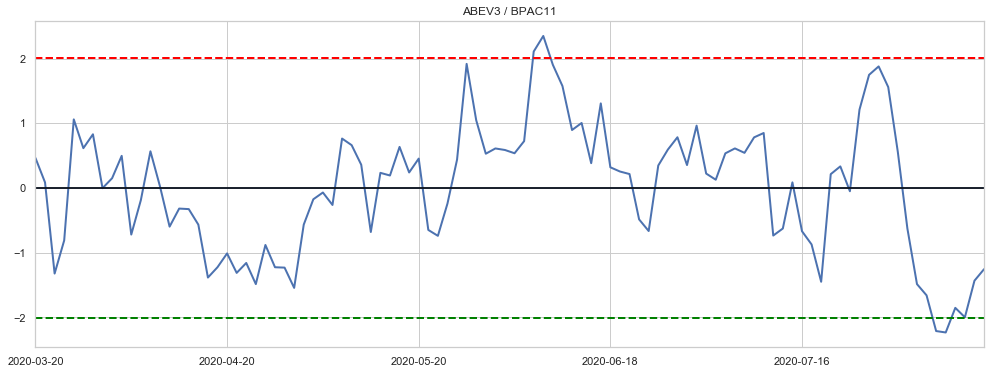

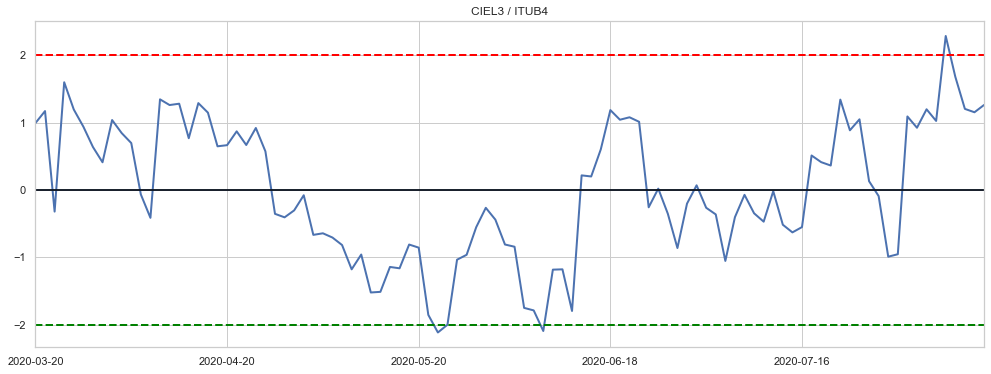

In [46]:
plot_pairs(oper, data)

In [47]:
#df.to_excel('datasets/data_cart.xlsx')

In [48]:
for i, row in oper.iterrows():
    y_symbol = row['Dependent']
    x_symbol = row['Independent']
    period = row['Period']
    mult.summary(data, y_symbol, x_symbol, period)

Período de Análise                   100   Entrada                              Não
Independente                       ABEV3   Dependente                        BPAC11
R$                                 13.48   R$                                 87.35
Ratio                0.15432169178835195   
Somente para operação Beta Neutral:
Retorno  (%)           7.130105061137259   Gain                   59.93601555366689
Atual    (%)            4.44629210601023   Loss                  -59.43067494996183
Loss     (%)          -4.408803929388139                                           
Dickey Fuller        -3.5168089137723846   Meia Vida                              3
ADF                                   99   Correlação  (%)       42.877254848083616
p-value             0.007565754709530136   Inverter                           False
                                           Beta                 0.07871056696071974
Ratio Entrada          6.667232716797391   
Ratio Saída            6.19185201941